In [1]:
# importa wordcloud e matplotlib
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import spacy

In [2]:
# Cajcodes
data = pd.read_csv("../data/hf_datasets/cajcodes.csv")
l = data[data['label'] == "L"].copy()
c = data[data['label'] == "C"].copy()
r = data[data['label'] == "R"].copy()

In [4]:
nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc
        if token.is_alpha                # solo palabras (no números o símbolos)
        and not token.is_stop            # sin stopwords
        and len(token) > 2               # al menos 3 letras
    ]
    return " ".join(tokens)

In [5]:
r[f"text_clean"] = r["text"].apply(preprocess_text)
l[f"text_clean"] = l["text"].apply(preprocess_text)
c[f"text_clean"] = c["text"].apply(preprocess_text)

# 1) WordCloud

In [6]:
text_l = " ".join(l["text_clean"].dropna())
text_r = " ".join(r["text_clean"].dropna())
text_c = " ".join(c["text_clean"].dropna())

wc_l = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="Reds",
    max_words=100
).generate(text_l)

wc_r = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="Blues",
    max_words=100
).generate(text_r)

wc_c = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="Greys_r",
    max_words=100
).generate(text_c)

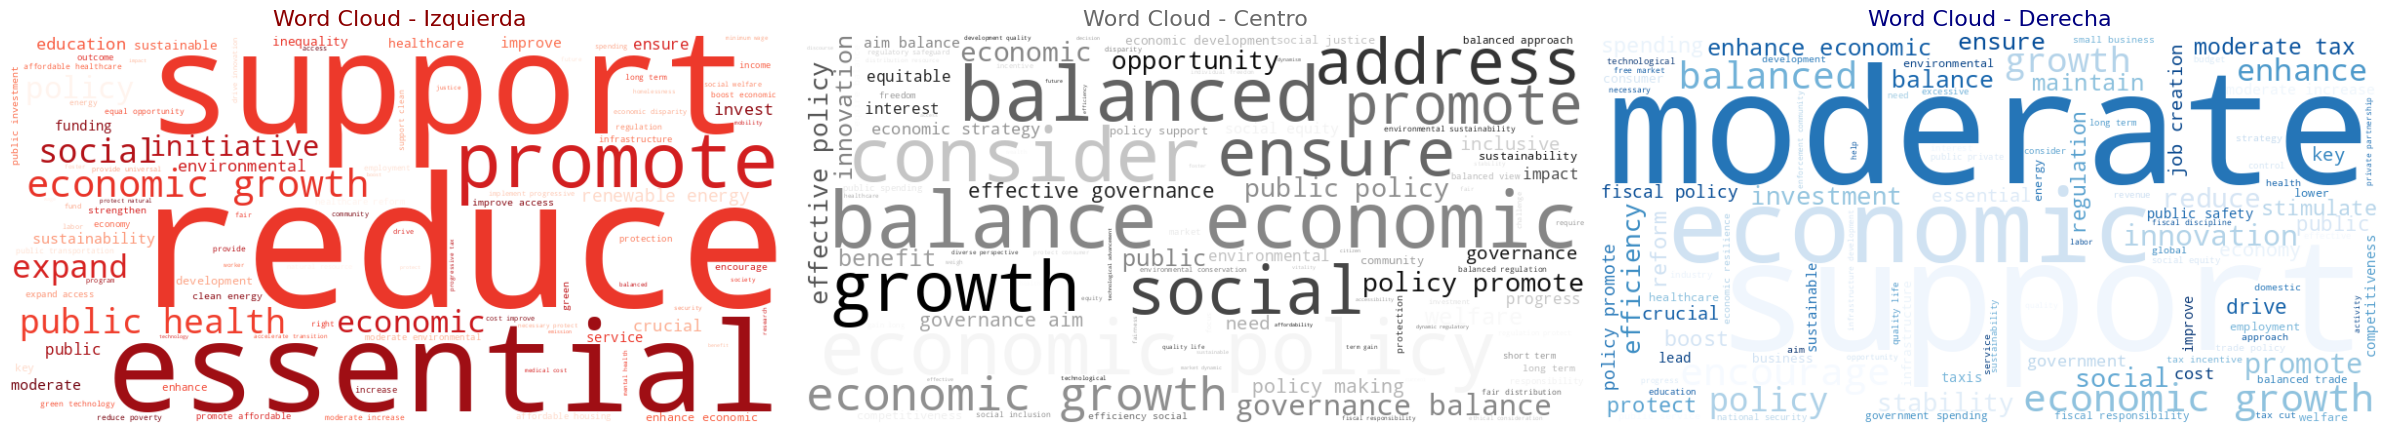

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

axes[0].imshow(wc_l, interpolation="bilinear")
axes[0].set_title("Word Cloud - Izquierda", fontsize=16, color="darkred")
axes[0].axis("off")

axes[1].imshow(wc_c, interpolation="bilinear")
axes[1].set_title("Word Cloud - Centro", fontsize=16, color="dimgray")
axes[1].axis("off")

axes[2].imshow(wc_r, interpolation="bilinear")
axes[2].set_title("Word Cloud - Derecha", fontsize=16, color="navy")
axes[2].axis("off")

plt.tight_layout()
plt.show()